# [BETA] Posterior Approximation for a Two interactions model for graph (for test)

#### Proposition #0:

$$P(y | n \theta) = exp[\theta_{l0} t_{edge\_l0}(y) + \theta_{l1} t_{edge\_l1}(y) + \theta_{l2} t_{edge\_l2}(y) + \theta_{l12} t_{edge\_l1\neq l2}(y) ] $$


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import json
from statsmodels.graphics.tsaplots import plot_acf

from math import exp

In [3]:
def print_config(data):
        if not isinstance(data, list):
            for k, v in data.items():
                if k != 'posteriors':
                    print("{} => {}".format(k, v))
                    
def extract_from_file(path):
    with open(path, 'r') as input_file:
        data = json.load(input_file)
    if not isinstance(data, list):
        print_config(data)
        data = data['posteriors']
    theta_l0 = [d[0] for d in data]
    theta_l1 = [d[1] for d in data]
    theta_l2 = [d[2] for d in data]
    theta_l12 = [d[3] for d in data]

    
    data_frame = pd.DataFrame({'theta_l0': theta_l0,
                               'theta_l1': theta_l1,
                               'theta_l2': theta_l2,
                               'theta_l12': theta_l12
                              })
    
    return data_frame


def summary(data):
    col_names = data.columns.values
    for i in [25,50,75]:
        print("========== Q{} ==========".format(i))
        for _, param_name in np.ndenumerate(col_names):
            q = np.percentile(data[param_name], i)
            print("Q{} for {} parameter {}".format(i, param_name, q))
    
    
def plot_marginals(data_abc, burn_in=0, by=1):
    
    col_names = data_abc.columns.values
    
    fig, axs = plt.subplots(len(col_names), 2, figsize=(14,25))
    
    for idx, param_name in np.ndenumerate(col_names):
        i = idx[0]
        # Sample parameter
        params = data_abc[param_name].tolist()[burn_in::by]

        # Distribution
        sns.distplot(params, axlabel="{} distribution ABC".format(param_name), ax=axs[i, 0])

        # Path
        axs[i, 1].plot(range(len(params)), params)
        axs[i, 1].set(xlabel='iterations', ylabel='{} parameter ABC'.format(param_name))

def plot_dist(data, burn_in=0, by=1):
    theta_l0 = data['l0'].tolist()[burn_in::by]
    theta_l1 = data['l1'].tolist()[burn_in::by]
    theta_tl2 = data['l2'].tolist()[burn_in::by]
    theta_tl12 = data['l12'].tolist()[burn_in::by]
    
    data_sampled = pd.DataFrame({'theta_l0': theta_l0,
                                 'theta_l1': theta_l1,
                                 'theta_l2': theta_l2,
                                 'theta_l12': theta_l12})
    
    g = sns.PairGrid(data_sampled, height=5)
    g = g.map_upper(plt.scatter)
    g = g.map_lower(sns.kdeplot, cmap="Blues_d")
    g = g.map_diag(sns.kdeplot, lw=3, legend=False)


def autocor(data_abc, burn_in=0, by=1):

    col_names = data_abc.columns.values
    fig, axs = plt.subplots(len(col_names), 1, sharex='col', sharey='row', figsize=(14,21)) 
    
    for idx, param_name in np.ndenumerate(col_names):
        i = idx[0]
        params = data_abc[param_name].tolist()[burn_in::by]
    
        plot_acf(params, ax=axs[i])
        axs[i].set_title("Autocorrelation for {} parameter".format(param_name))

### Experimentation #1

In [7]:
FILE_NAME_1 = 'assets/exp-beta1.json'
data1 = extract_from_file(FILE_NAME_1)

algo => abc_shadow
model => 2_interactions
theta0 => [0.4, 0.4, 0.2, 0.8]
theta_perf => [0.4, 0.4, 0.2, 0.8]
iters => 10000
n => 80
delta => [0.01, 0.01, 0.01, 0.01]
y_obs => [32.3582, 6.5303, 6.1115, 15.4287]


In [8]:
summary(data1)

========== Q25 ==========
Q25 for theta_l0 parameter 0.7656615724531186
Q25 for theta_l1 parameter 0.08168038199128462
Q25 for theta_l2 parameter 0.05428116833775479
Q25 for theta_l12 parameter 0.018828701882302384
========== Q50 ==========
Q50 for theta_l0 parameter 0.9075287203635983
Q50 for theta_l1 parameter 0.23016752054849482
Q50 for theta_l2 parameter 0.11249706498195286
Q50 for theta_l12 parameter 0.05885501556599105
========== Q75 ==========
Q75 for theta_l0 parameter 0.9645832855941736
Q75 for theta_l1 parameter 0.3579359986645787
Q75 for theta_l2 parameter 0.23880841227749594
Q75 for theta_l12 parameter 0.23582626702291212


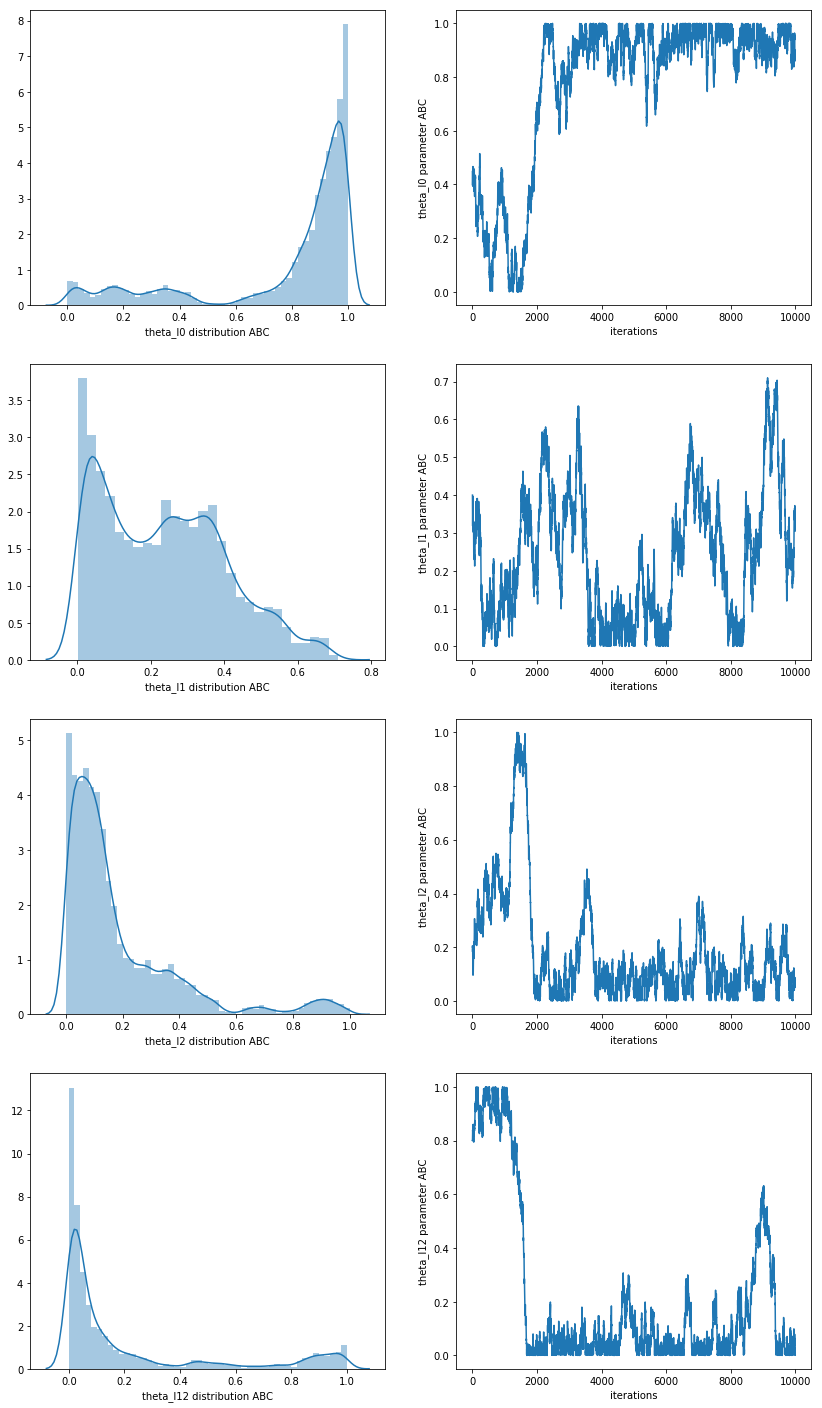

In [9]:
plot_marginals(data1)
# plt.savefig('post_interactions_marginals.pdf')

### Experimentation #2
* sample size : $size=10$ nodes (for a complete graph)
* $\theta_0 = [1, -1, 1]$
* $y \sim  Metropolis\_Hasting(\theta_0, iter=100)$
* $\Delta=[0.05,0.05, 0.05]$
* Number of samples: $n=1000$
* Shadow chain length: $n_{shadow} = 100$

In [11]:
FILE_NAME_2 = 'assets/exp-beta2.json'
data2 = extract_from_file(FILE_NAME_2)

algo => abc_shadow
model => 2_interactions
theta0 => [0.5, 0.5, 0.5, 0.0]
theta_perf => [0.5, 0.5, 0.5, 0.0]
iters => 10000
n => 80
delta => [0.01, 0.01, 0.01, 0.01]
y_obs => [15.0053, 14.9861, 15.0086, 79.9636]


In [12]:
summary(data2)

========== Q25 ==========
Q25 for theta_l0 parameter 0.35453485737812723
Q25 for theta_l1 parameter 0.198163168059237
Q25 for theta_l2 parameter 0.44654256377176127
Q25 for theta_l12 parameter 0.0
========== Q50 ==========
Q50 for theta_l0 parameter 0.5272342506110916
Q50 for theta_l1 parameter 0.3346843134060504
Q50 for theta_l2 parameter 0.5842903954089709
Q50 for theta_l12 parameter 0.0
========== Q75 ==========
Q75 for theta_l0 parameter 0.6787441180450635
Q75 for theta_l1 parameter 0.6145777184264348
Q75 for theta_l2 parameter 0.8078684497086085
Q75 for theta_l12 parameter 0.0


/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


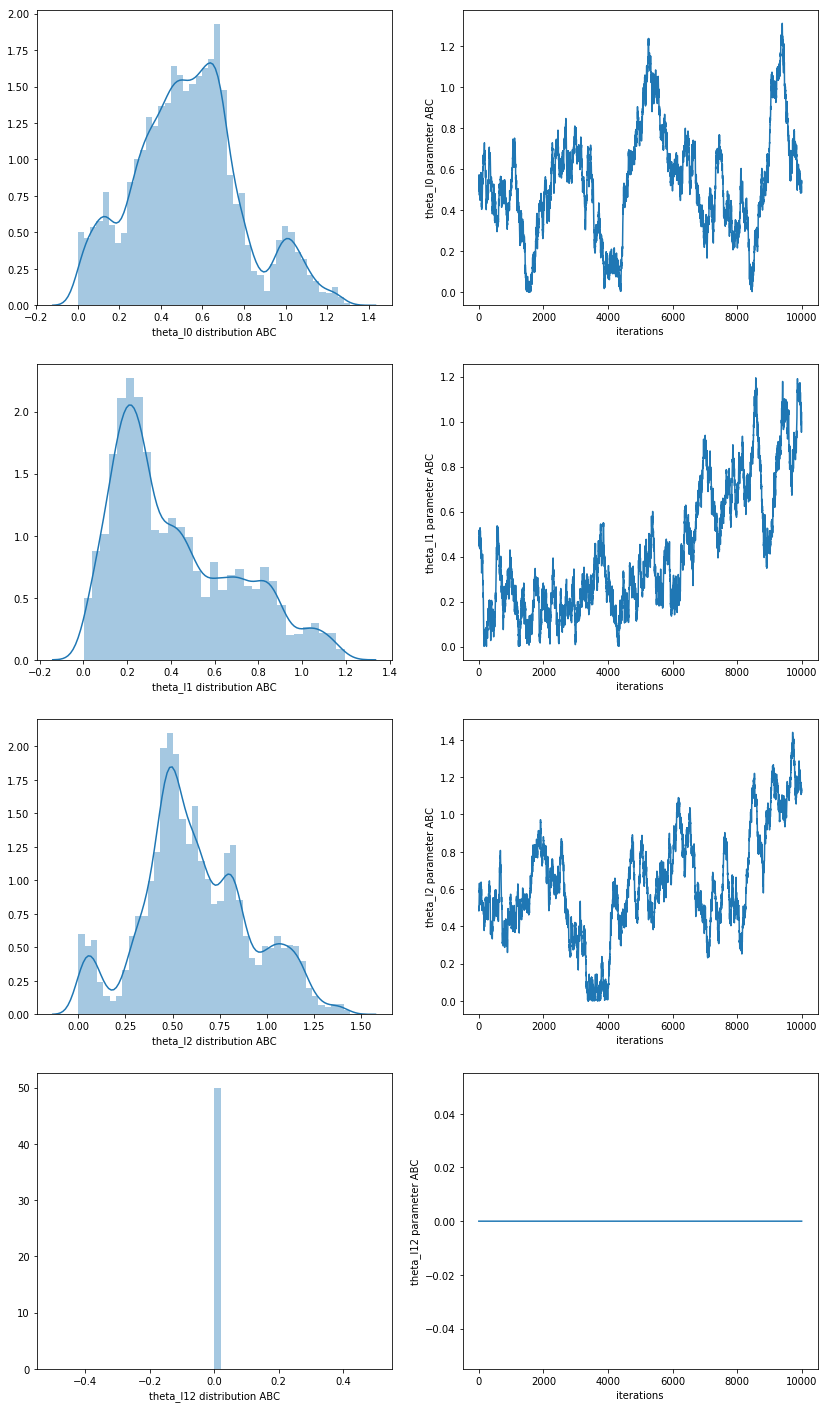

In [13]:
plot_marginals(data2)

### Experimentation #3

In [14]:
FILE_NAME_3 = 'assets/exp-beta3.json'
data3 = extract_from_file(FILE_NAME_3)

algo => abc_shadow
model => 2_interactions
theta0 => [1.0, 1.0, 1.0, 0.0]
theta_perf => [1.0, 1.0, 1.0, 0.0]
iters => 10000
n => 80
delta => [0.01, 0.01, 0.01, 0.01]
y_obs => [15.023469387755101, 14.970408163265306, 15.006122448979593, 79.90408163265306]


In [15]:
summary(data3)

========== Q25 ==========
Q25 for theta_l0 parameter 0.6797551159021457
Q25 for theta_l1 parameter 0.5878428631524799
Q25 for theta_l2 parameter 0.8483964196391423
Q25 for theta_l12 parameter 0.0
========== Q50 ==========
Q50 for theta_l0 parameter 0.8336150738089385
Q50 for theta_l1 parameter 0.7995925579890546
Q50 for theta_l2 parameter 1.0392093272129572
Q50 for theta_l12 parameter 0.0
========== Q75 ==========
Q75 for theta_l0 parameter 1.1176200307722606
Q75 for theta_l1 parameter 1.1737364955325145
Q75 for theta_l2 parameter 1.1914438777078233
Q75 for theta_l12 parameter 0.0


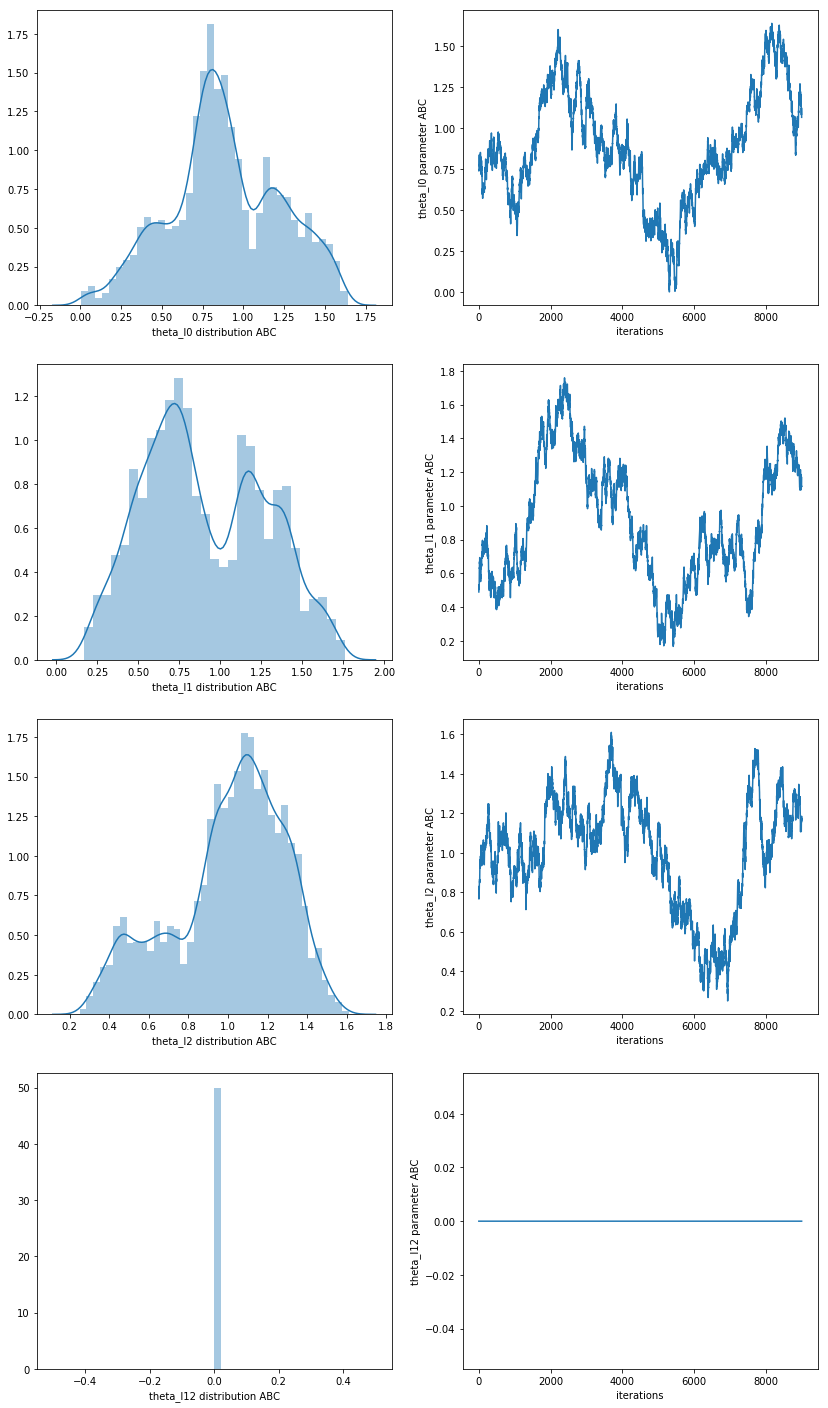

In [16]:
plot_marginals(data3, burn_in=1000)

## Experiment #4

In [17]:
FILE_NAME_4 = 'assets/exp-beta4.json'
data4 = extract_from_file(FILE_NAME_4)

algo => abc_shadow
model => 2_interactions
theta0 => [1.0, 1.0, 1.0, 0.0]
theta_perf => [1.0, 1.0, 1.0, 0.0]
iters => 80000
n => 100
delta => [0.01, 0.01, 0.01, 0.01]
y_obs => [15.023469387755101, 14.970408163265306, 15.006122448979593, 79.90408163265306]


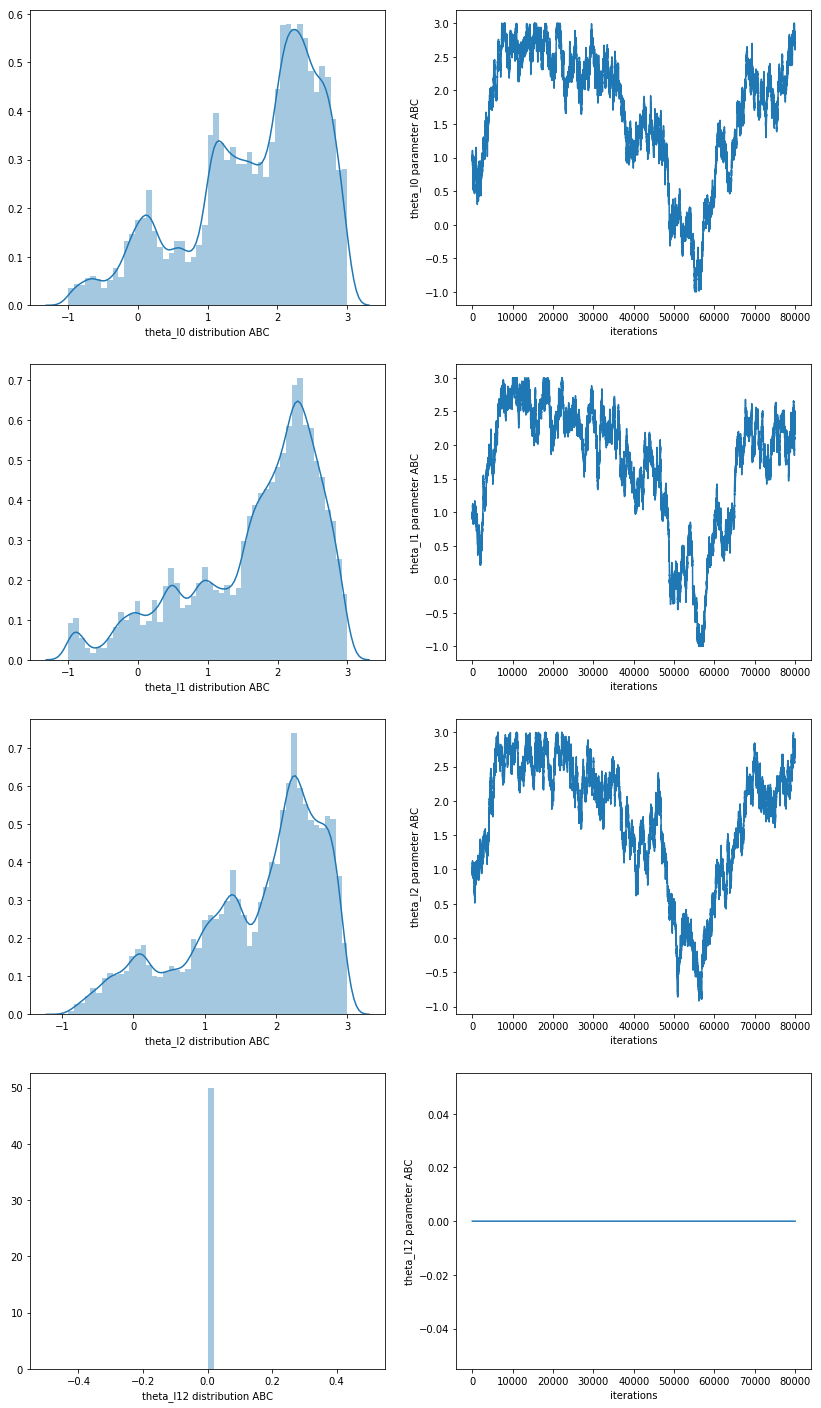

In [18]:
plot_marginals(data4)

### Experiment #5

In [19]:
FILE_NAME_5 = 'assets/exp-beta5.json'
data5 = extract_from_file(FILE_NAME_5)

algo => abc_shadow
model => 2_interactions
theta0 => [1.0, 1.0, 1.0, 0.0]
theta_perf => [1.0, 1.0, 1.0, 0.0]
iters => 80000
n => 80
delta => [0.01, 0.01, 0.01, 0.01]
y_obs => [15.023469387755101, 14.970408163265306, 15.006122448979593, 79.90408163265306]


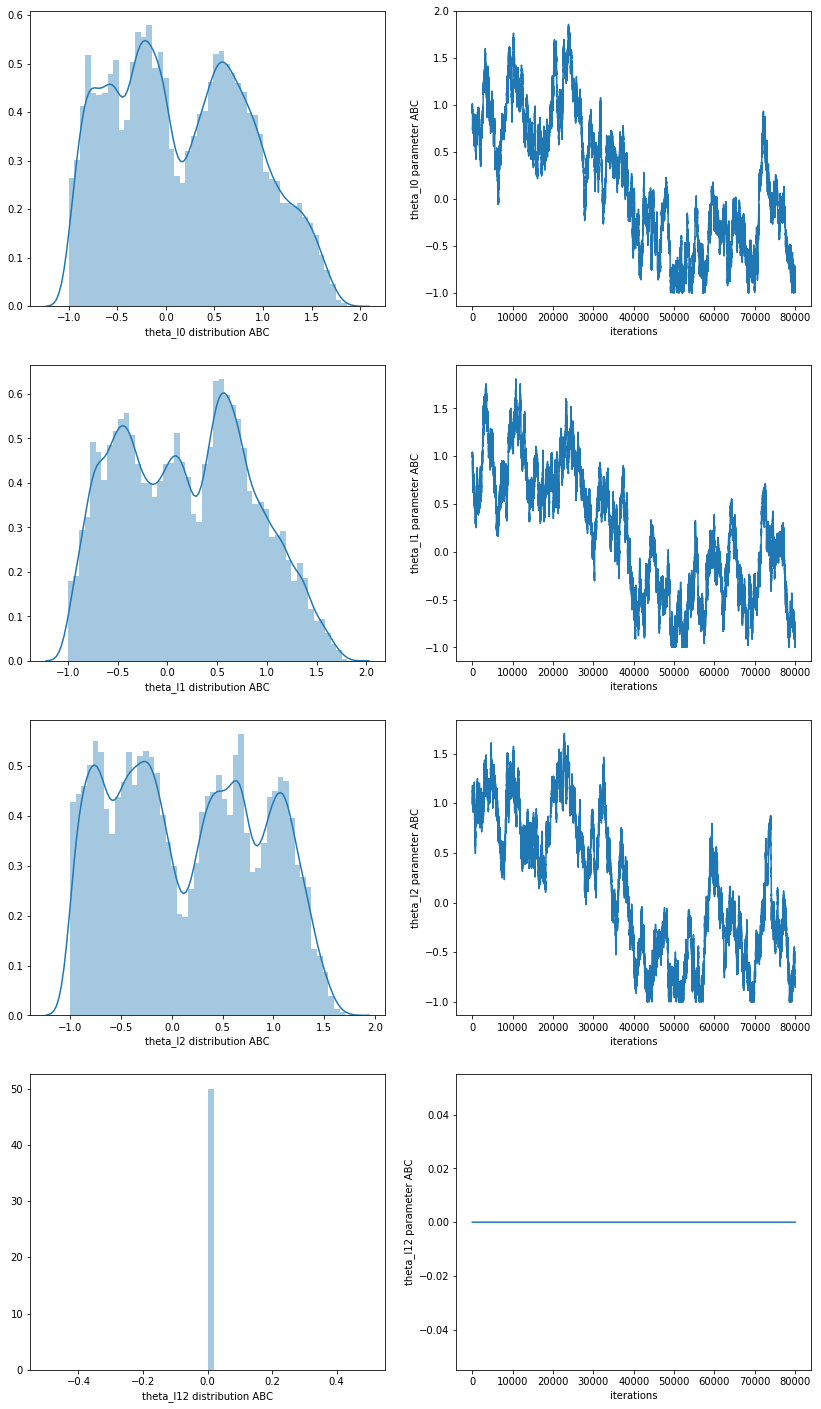

In [20]:
plot_marginals(data5)

### Experiment #5

In [21]:
FILE_NAME_6 = 'assets/exp-beta6.json'
data6 = extract_from_file(FILE_NAME_6)

algo => abc_shadow
model => 2_interactions
theta0 => [1.0, 1.0, 1.0, 0.0]
theta_perf => [1.0, 1.0, 1.0, 0.0]
iters => 80000
n => 150
delta => [0.01, 0.01, 0.01, 0.01]
y_obs => [15.023469387755101, 14.970408163265306, 15.006122448979593, 79.90408163265306]


/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


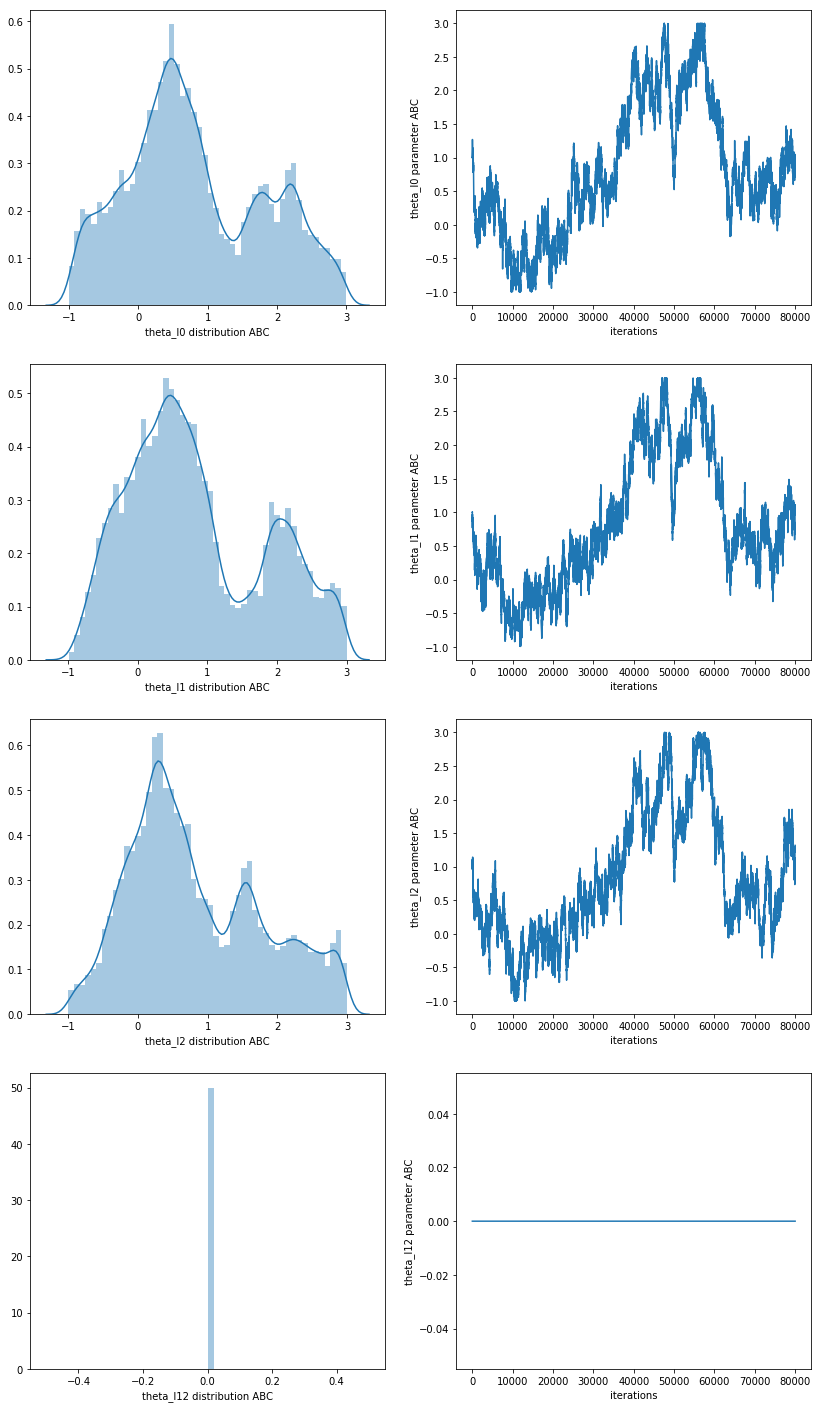

In [23]:
plot_marginals(data6)

# Prosition #1 :
$$P(y | n \theta) = exp[\theta_{l0} t_{edge\neq l0}(y) + \theta_{l1} t_{edge\_l1}(y) + \theta_{l2} t_{edge\_l2}(y) + \theta_{l12} t_{edge\_l1\neq l2}(y) ] $$

In [4]:
FILE_NAME_7 = 'assets/exp-beta7.json'
data7 = extract_from_file(FILE_NAME_7)

algo => abc_shadow
model => 2_interactions
theta0 => [-4.2, 1.0, 1.0, 0.6]
theta_perf => [-4.2, 1.0, 1.0, 0.6]
iters => 80000
n => 100
delta => [0.01, 0.01, 0.01, 0.01]
y_obs => [32.0437, 16.0155, 16.0282, 113.5091]


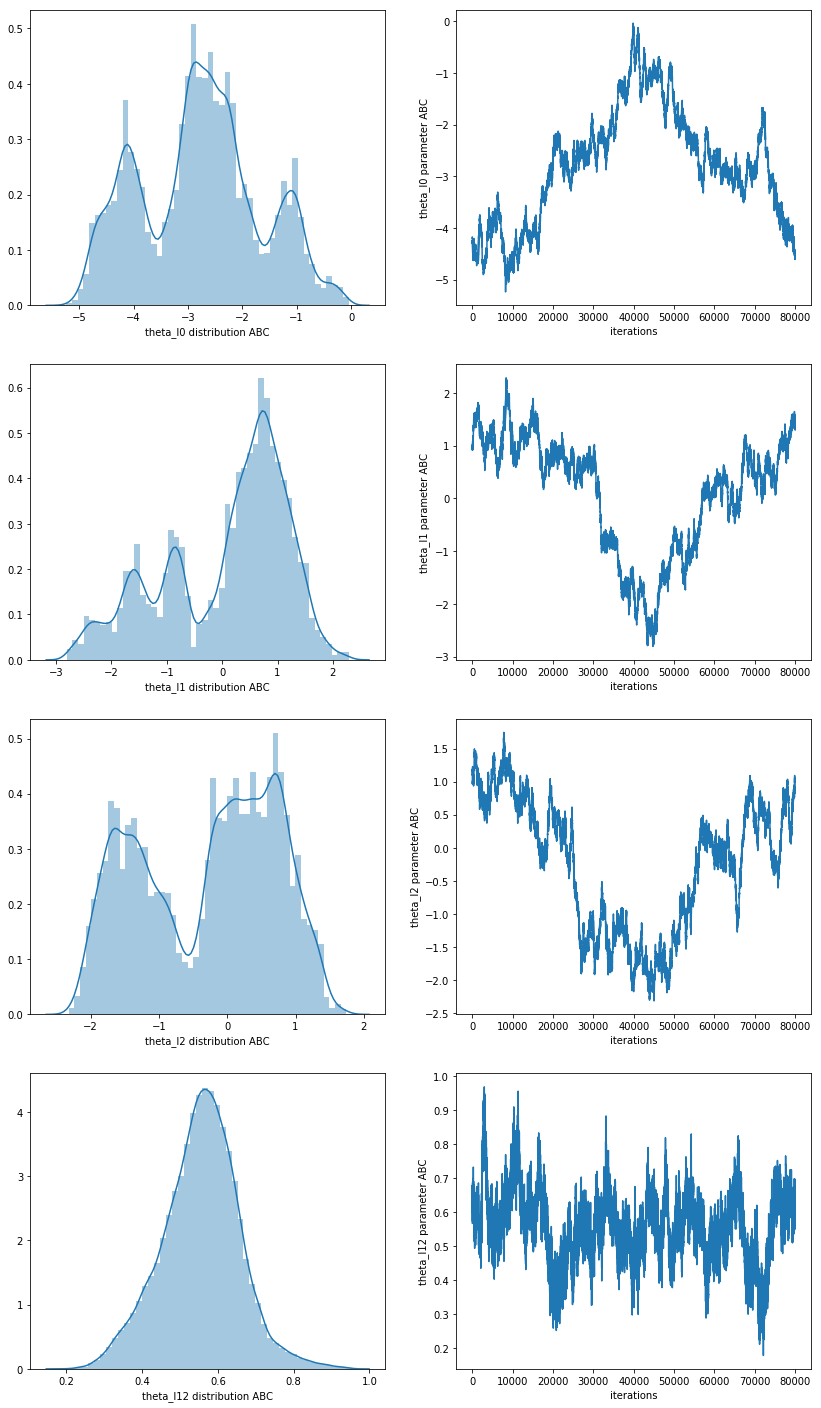

In [5]:
plot_marginals(data7)

In [7]:
FILE_NAME_8 = 'assets/exp-beta8.json'
data8 = extract_from_file(FILE_NAME_8)

algo => abc_shadow
model => 2_interactions
theta0 => [-4.2, 1.0, 1.0, 0.6]
theta_perf => [-4.2, 1.0, 1.0, 0.6]
iters => 80000
n => 80
delta => [0.01, 0.01, 0.01, 0.01]
y_obs => [32.0437, 16.0155, 16.0282, 113.5091]


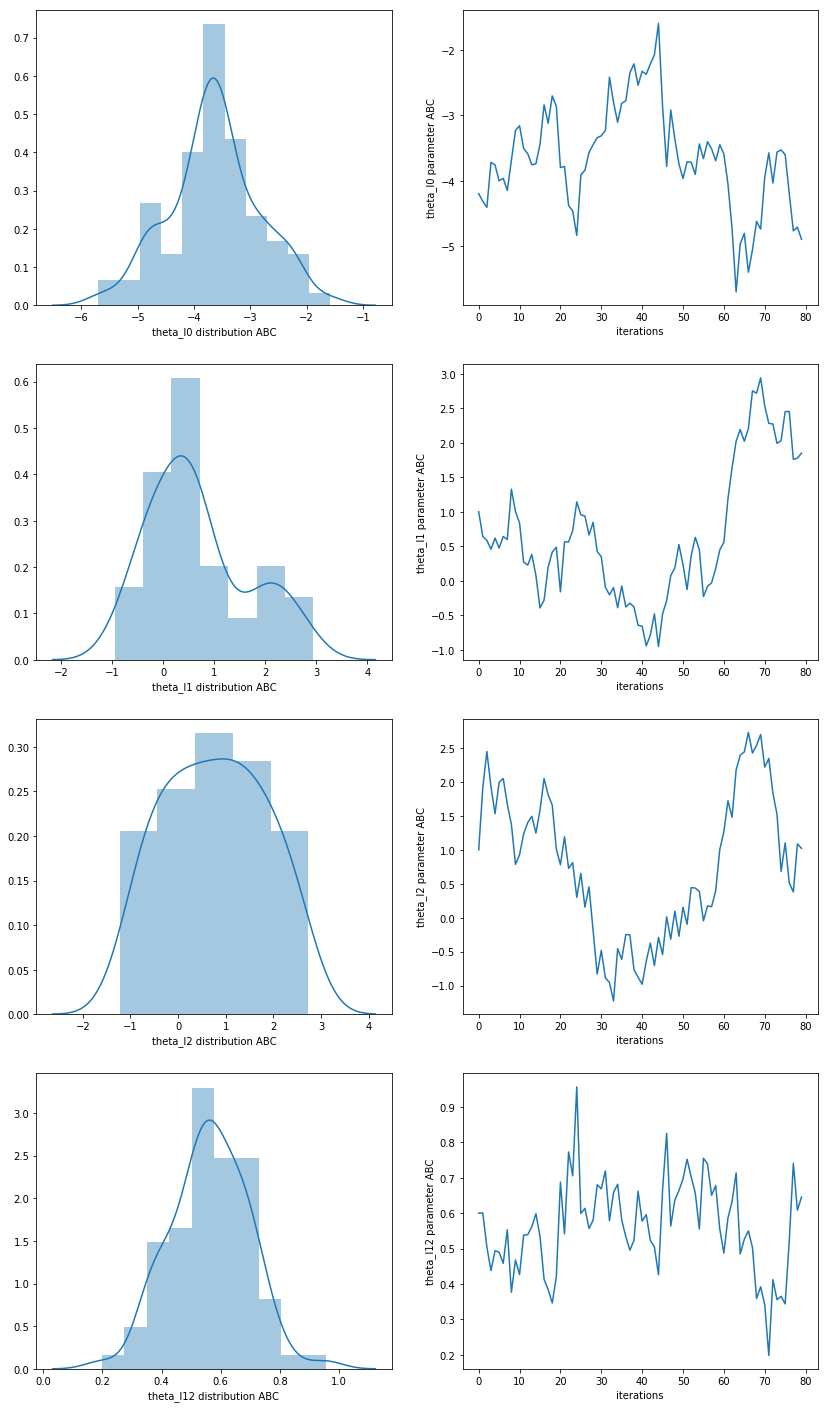

In [11]:
plot_marginals(data8, by=1000)